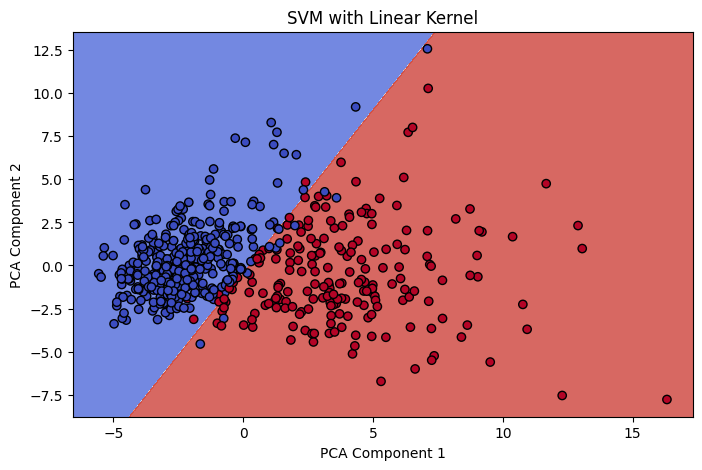

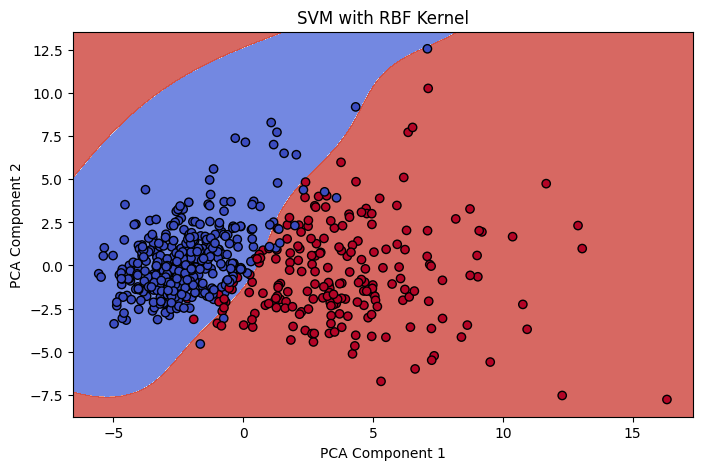

🔧 Best Parameters: {'C': 10, 'gamma': 0.01}
 Cross-Validation Accuracy: 94.21%

 Confusion Matrix:
 [[71  0]
 [ 3 40]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset from local CSV
df = pd.read_csv("C:/Users/TANYA/OneDrive/Desktop/archive/breast-cancer.csv")

# Drop irrelevant columns if present
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Encode target column (M = Malignant, B = Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split into features and labels
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_linear, X_pca, y, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_pca, y, "SVM with RBF Kernel")

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("🔧 Best Parameters:", grid.best_params_)

# Cross-validation
cv_scores = cross_val_score(grid.best_estimator_, X_pca, y, cv=5)
print(" Cross-Validation Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))

# Evaluate final model
y_pred = grid.predict(X_test)
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
